In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 1
order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        'CD4 effector memory','CD4 central memory']
file = 'BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avgdivbyCTFRAG_CSxOut.txt_irAEgt.txt_ctrename_onlypretx_removethaty4.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

In [3]:
conditions = [(df['Toxicity'] <= cutoff), (df['Toxicity'] > cutoff)]
values = ['toxicity <= ' + str(cutoff), 'toxicity > ' + str(cutoff)]
df['Toxic'] = np.select(conditions, values)
df

,Naive CD4,Naive CD8,Naive B cell,NK,Plasma,Mono,M0,M1,M2,iDC,...,Eosinophil,Tregs,CD4 effector memory,CD8 effector,Megakaryocyte,CD4 central memory,Erythrocyte,Memory B cell,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,0.051588,0.069508,0.065360,0.113798,0.052444,0.127384,0.085173,0.083226,0.078528,0.088162,...,0.138554,0.063134,0.084466,0.082407,0.180821,0.077413,0.155470,0.053942,1,toxicity <= 1
tot-YUTAUR_19-3926-cfDNA,0.040885,0.023596,0.038292,0.060977,0.059791,0.062151,0.046403,0.035177,0.043406,0.051047,...,0.067405,0.038230,0.023246,0.066276,0.151325,0.033961,0.110148,0.071457,3,toxicity > 1
tot-YUTHEA_20-4000-cfDNA,0.055914,0.058524,0.054953,0.103133,0.108493,0.086785,0.091219,0.085925,0.084632,0.087027,...,0.120978,0.085872,0.085402,0.091146,0.404789,0.046982,0.321342,0.053298,1,toxicity <= 1
Y-3674-cfDNA,0.043760,0.024630,0.065414,0.085665,0.075339,0.052723,0.065758,0.040855,0.057082,0.064706,...,0.099576,0.059566,0.037973,0.032232,0.245207,0.007761,0.155339,0.059898,0,toxicity <= 1
Y-3688-cfDNA,0.057362,0.046655,0.044115,0.080198,0.070375,0.058068,0.092349,0.105148,0.086074,0.079564,...,0.066583,0.083938,0.066338,0.075597,0.223682,0.039389,0.256827,0.047222,3,toxicity > 1
Y-3703-cfDNA,0.053060,0.042786,0.000000,0.099600,0.061224,0.087259,0.060095,0.031478,0.073751,0.050592,...,0.090359,0.007733,0.108277,0.096178,0.292625,0.046283,0.222139,0.039546,3,toxicity > 1
Y-3707-cfDNA,0.069280,0.084346,0.007370,0.110655,0.000000,0.062013,0.048456,0.049790,0.074682,0.084837,...,0.078720,0.000000,0.104862,0.075646,0.461636,0.030837,0.263961,0.023707,0,toxicity <= 1
Y-3715-cfDNA,0.051788,0.077116,0.016008,0.087818,0.053651,0.096119,0.072429,0.075768,0.069542,0.058271,...,0.070355,0.077757,0.019141,0.101176,0.202812,0.062575,0.195533,0.075941,3,toxicity > 1
Y-3814-cfDNA,0.039497,0.017226,0.014013,0.066738,0.078074,0.111075,0.059527,0.061403,0.051319,0.071755,...,0.035844,0.024423,0.045614,0.073642,0.172742,0.011086,0.217425,0.049396,2,toxicity > 1


In [4]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.median(p_val_list[0]) >= np.median(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'Memory B cell': -0.45777183112114195,
 'CD8 effector': -0.04869660101381998,
 'NK': -0.37293046899355214,
 'Naive B cell': -0.3734535323322185,
 'Naive CD8': -0.2263577170354382,
 'CD8 central memory': -0.9601950592268592,
 'Plasma': -0.04869660101381998,
 'Mono': -0.04869660101381998,
 'CD8 effector memory': 0.13158730424082613,
 'Tregs': -0.29672145732721994,
 'Naive CD4': -0.4551287704610962,
 'CD4 effector memory': -0.5442534347837132,
 'CD4 central memory': 0.6380091358854261}

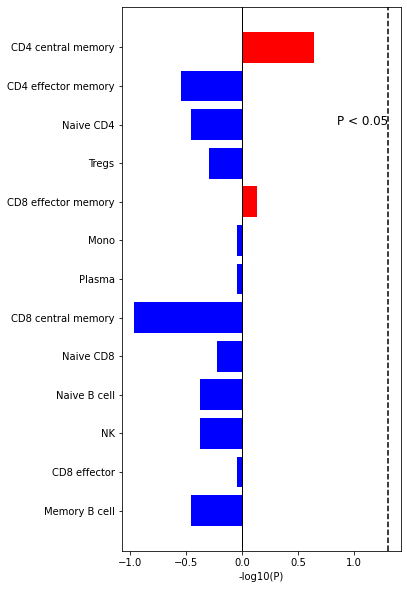

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='b')
    else:
        ax.barh(cell, y, color='r')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_cutoff_'+str(cutoff)+'_toxicity_barplot.pdf', bbox_inches='tight')